In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data=pd.read_csv('final_target_data.csv')

In [3]:
data.head()

,TARGET,year,month,hour,weekday,ADDR_PCT_CD,CRIME_CLASS,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,LOCATION_CODE
0,0,2008,5,18,1,44.0,0,0,0,0,0
1,0,2014,5,11,3,94.0,0,1,1,0,1
2,1,2016,5,12,5,100.0,1,2,1,0,2
3,0,2022,1,8,4,103.0,0,2,0,0,3
4,0,2022,9,20,5,103.0,0,2,0,0,4


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6193581 entries, 0 to 6193580
Data columns (total 11 columns):
 #   Column         Dtype  
---  ------         -----  
 0   TARGET         int64  
 1   year           int64  
 2   month          int64  
 3   hour           int64  
 4   weekday        int64  
 5   ADDR_PCT_CD    float64
 6   CRIME_CLASS    int64  
 7   VIC_AGE_GROUP  int64  
 8   VIC_RACE       int64  
 9   VIC_SEX        int64  
 10  LOCATION_CODE  int64  
dtypes: float64(1), int64(10)
memory usage: 519.8 MB


In [4]:
X = data.drop(columns='TARGET')
y = data['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# I. Random Forest

In [6]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [7]:
y_pred = rf_model.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')


Accuracy: 0.7982


In [10]:
print('Unique values in y_test:', np.unique(y_test))
print('Unique values in y_pred:', np.unique(y_pred))


Unique values in y_test: [0 1 2 3]
Unique values in y_pred: [0 1 2 3]


Unique values in y_test: [0 1 2 3]
Unique values in y_pred: [0 1 2 3]


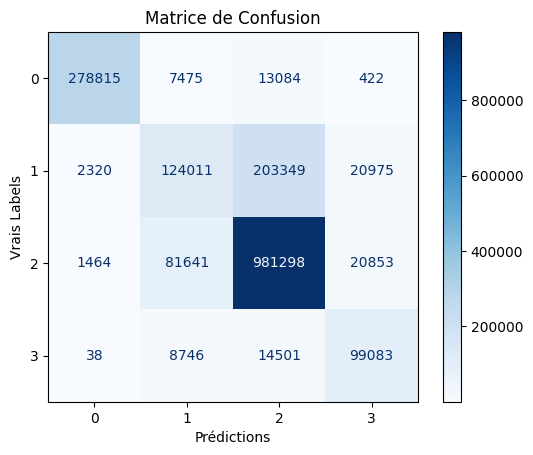

In [11]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)

print('Unique values in y_test:', np.unique(y_test))
print('Unique values in y_pred:', np.unique(y_pred))

disp = ConfusionMatrixDisplay(conf_matrix, display_labels=np.unique(y_test))

# Affichage de la matrice de confusion
disp.plot(cmap='Blues', values_format='d')
plt.title('Matrice de Confusion')
plt.xlabel('Prédictions')
plt.ylabel('Vrais Labels')
plt.show()




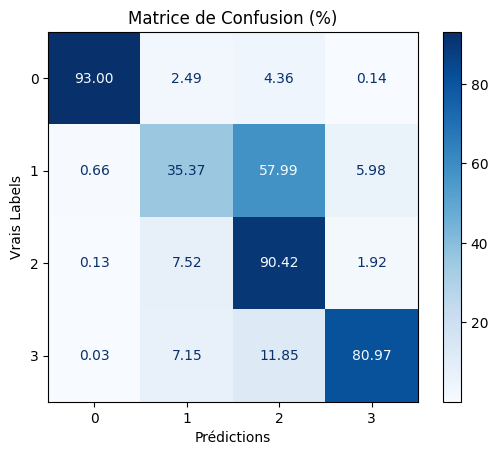

In [12]:

conf_matrix_percentage = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100


disp = ConfusionMatrixDisplay(conf_matrix_percentage, display_labels=np.unique(y_test))

disp.plot(cmap='Blues', values_format='.2f')
plt.title('Matrice de Confusion (%)')
plt.xlabel('Prédictions')
plt.ylabel('Vrais Labels')
plt.show()


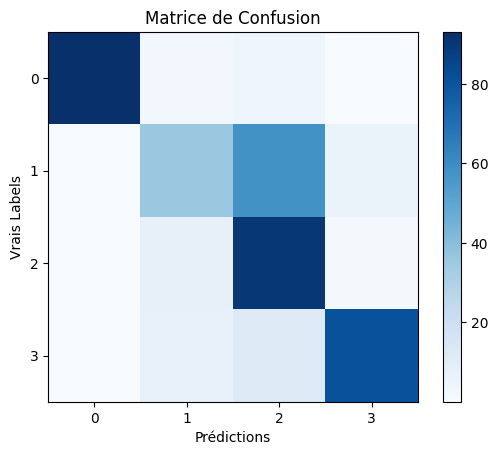

In [15]:

conf_matrix_percentage = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100


disp = ConfusionMatrixDisplay(conf_matrix_percentage, display_labels=np.unique(y_test))

disp.plot(cmap='Blues', include_values=False)
plt.title('Matrice de Confusion')
plt.xlabel('Prédictions')
plt.ylabel('Vrais Labels')
plt.show()


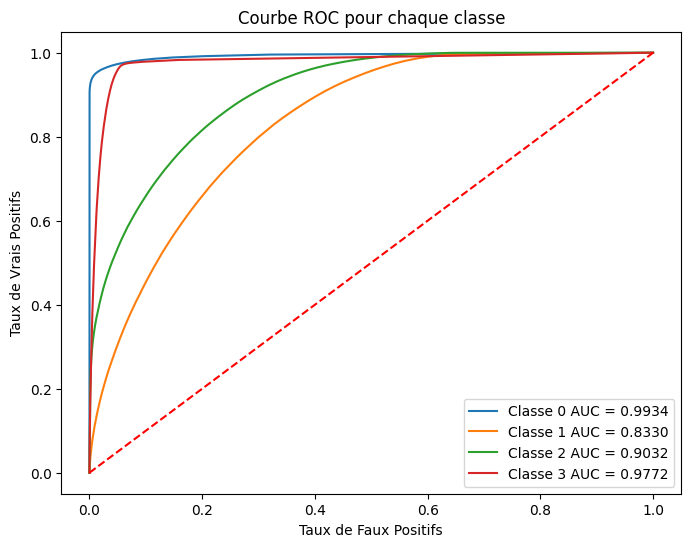

In [17]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

y_test_bin = label_binarize(y_test, classes=np.unique(y_test))  
y_pred_prob = rf_model.predict_proba(X_test) 

plt.figure(figsize=(8, 6))

for i in range(y_test_bin.shape[1]):
    fpr, tpr, thresholds = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc = roc_auc_score(y_test_bin[:, i], y_pred_prob[:, i])  
    plt.plot(fpr, tpr, label=f'Classe {i} AUC = {roc_auc:.4f}') 

plt.plot([0, 1], [0, 1], color='red', linestyle='--')

# Titre et étiquettes du graphique
plt.title('Courbe ROC pour chaque classe')
plt.xlabel('Taux de Faux Positifs')
plt.ylabel('Taux de Vrais Positifs')
plt.legend(loc='lower right')
plt.show()



In [18]:
# AUC score
print(f'AUC: {roc_auc:.4f}')

AUC: 0.9772


# II. SVM

In [19]:
X = data.drop(columns='TARGET')
y = data['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.svm import SVC

svm_model = SVC(probability=True, random_state=42)  # probability=True is necessary for predict_proba
svm_model.fit(X_train, y_train)


In [ ]:
y_pred = svm_model.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')


In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)

print('Unique values in y_test:', np.unique(y_test))
print('Unique values in y_pred:', np.unique(y_pred))

disp = ConfusionMatrixDisplay(conf_matrix, display_labels=np.unique(y_test))

# Displaying the confusion matrix
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.xlabel('Predictions')
plt.ylabel('True Labels')
plt.show()


In [ ]:
conf_matrix_percentage = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

disp = ConfusionMatrixDisplay(conf_matrix_percentage, display_labels=np.unique(y_test))

disp.plot(cmap='Blues', values_format='.2f')
plt.title('Confusion Matrix (%)')
plt.xlabel('Predictions')
plt.ylabel('True Labels')
plt.show()


In [ ]:
conf_matrix_percentage = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

disp = ConfusionMatrixDisplay(conf_matrix_percentage, display_labels=np.unique(y_test))

disp.plot(cmap='Blues', include_values=False)  # Remove the actual numbers
plt.title('Confusion Matrix')
plt.xlabel('Predictions')
plt.ylabel('True Labels')
plt.show()


In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

y_test_bin = label_binarize(y_test, classes=np.unique(y_test))  
y_pred_prob = svm_model.predict_proba(X_test) 

plt.figure(figsize=(8, 6))

for i in range(y_test_bin.shape[1]):
    fpr, tpr, thresholds = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc = roc_auc_score(y_test_bin[:, i], y_pred_prob[:, i])  
    plt.plot(fpr, tpr, label=f'Class {i} AUC = {roc_auc:.4f}') 

plt.plot([0, 1], [0, 1], color='red', linestyle='--')

# Title and labels for the plot
plt.title('ROC Curve for Each Class')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


In [ ]:
# AUC score
print(f'AUC: {roc_auc:.4f}')


# III. KNN

In [5]:
X = data.drop(columns='TARGET')
y = data['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)  # n_neighbors specifies the number of neighbors to consider
knn_model.fit(X_train, y_train)


KNeighborsClassifier()

In [7]:
y_pred = knn_model.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')


Accuracy: 0.5993


Unique values in y_test: [0 1 2 3]
Unique values in y_pred: [0 1 2 3]


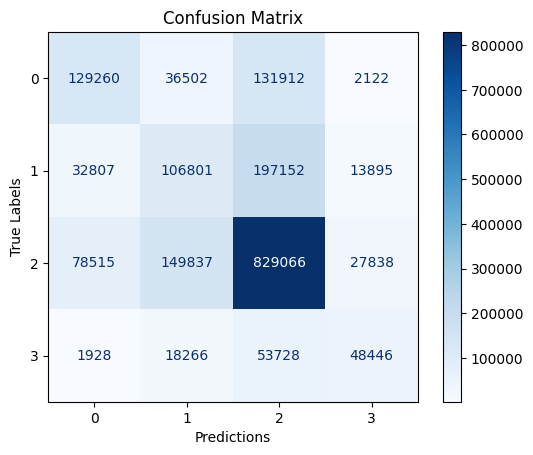

In [8]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)

print('Unique values in y_test:', np.unique(y_test))
print('Unique values in y_pred:', np.unique(y_pred))

disp = ConfusionMatrixDisplay(conf_matrix, display_labels=np.unique(y_test))

# Displaying the confusion matrix
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.xlabel('Predictions')
plt.ylabel('True Labels')
plt.show()


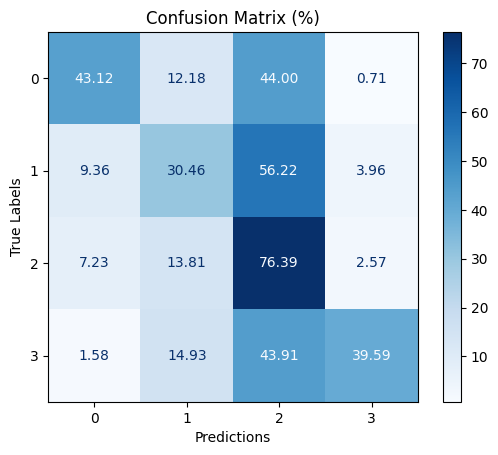

In [9]:
conf_matrix_percentage = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

disp = ConfusionMatrixDisplay(conf_matrix_percentage, display_labels=np.unique(y_test))

disp.plot(cmap='Blues', values_format='.2f')
plt.title('Confusion Matrix (%)')
plt.xlabel('Predictions')
plt.ylabel('True Labels')
plt.show()


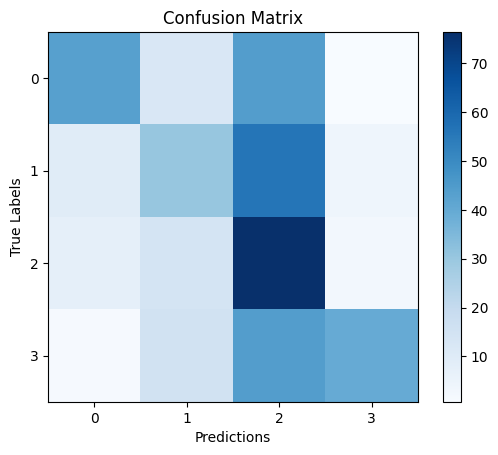

In [10]:
conf_matrix_percentage = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

disp = ConfusionMatrixDisplay(conf_matrix_percentage, display_labels=np.unique(y_test))

disp.plot(cmap='Blues', include_values=False)  # Remove the actual numbers
plt.title('Confusion Matrix')
plt.xlabel('Predictions')
plt.ylabel('True Labels')
plt.show()


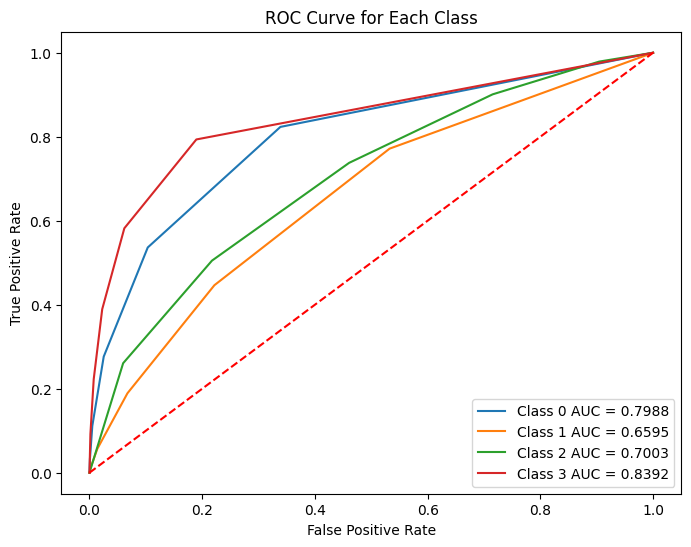

In [11]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

y_test_bin = label_binarize(y_test, classes=np.unique(y_test))  
y_pred_prob = knn_model.predict_proba(X_test)  # Get probability estimates for each class

plt.figure(figsize=(8, 6))

for i in range(y_test_bin.shape[1]):
    fpr, tpr, thresholds = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc = roc_auc_score(y_test_bin[:, i], y_pred_prob[:, i])  
    plt.plot(fpr, tpr, label=f'Class {i} AUC = {roc_auc:.4f}') 

plt.plot([0, 1], [0, 1], color='red', linestyle='--')

# Title and labels for the plot
plt.title('ROC Curve for Each Class')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


In [12]:
# AUC score
print(f'AUC: {roc_auc:.4f}')


AUC: 0.8392


# IV. XGBoost

In [5]:
X = data.drop(columns='TARGET')
y = data['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [6]:
import xgboost as xgb

# Initialize XGBoost model with parameters
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:06:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [7]:
y_pred = xgb_model.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')


Accuracy: 0.8016


Unique values in y_test: [0 1 2 3]
Unique values in y_pred: [0 1 2 3]


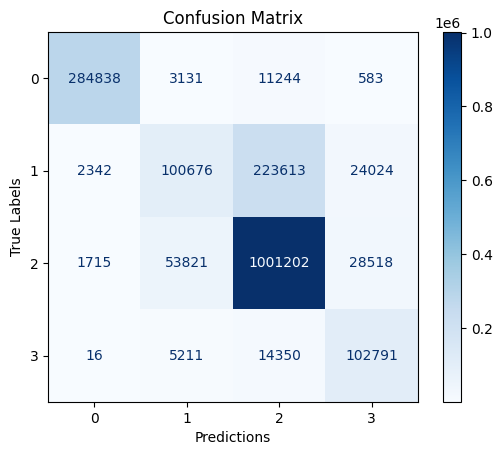

In [8]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)

print('Unique values in y_test:', np.unique(y_test))
print('Unique values in y_pred:', np.unique(y_pred))

disp = ConfusionMatrixDisplay(conf_matrix, display_labels=np.unique(y_test))

# Display the confusion matrix
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.xlabel('Predictions')
plt.ylabel('True Labels')
plt.show()


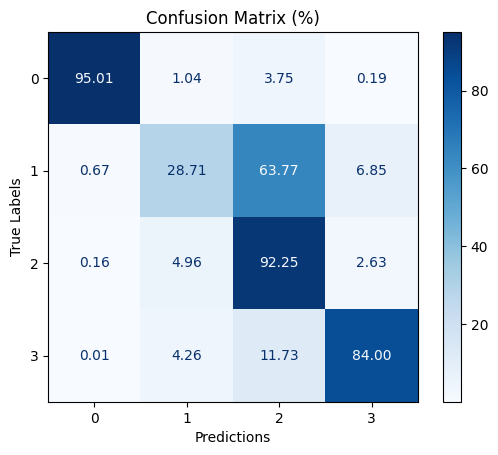

In [9]:
conf_matrix_percentage = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

disp = ConfusionMatrixDisplay(conf_matrix_percentage, display_labels=np.unique(y_test))

disp.plot(cmap='Blues', values_format='.2f')
plt.title('Confusion Matrix (%)')
plt.xlabel('Predictions')
plt.ylabel('True Labels')
plt.show()


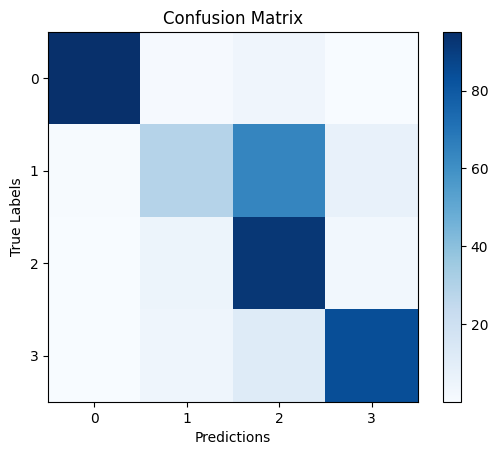

In [10]:
conf_matrix_percentage = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

disp = ConfusionMatrixDisplay(conf_matrix_percentage, display_labels=np.unique(y_test))

disp.plot(cmap='Blues', include_values=False)  # Remove the numbers
plt.title('Confusion Matrix')
plt.xlabel('Predictions')
plt.ylabel('True Labels')
plt.show()


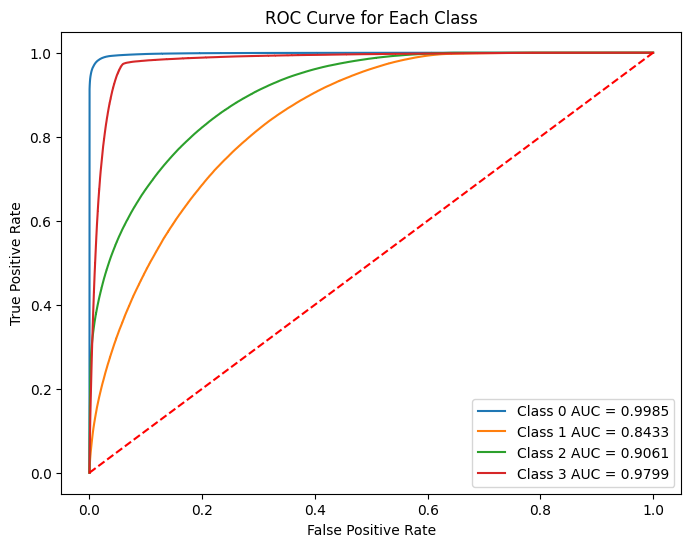

In [11]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

y_test_bin = label_binarize(y_test, classes=np.unique(y_test))  
y_pred_prob = xgb_model.predict_proba(X_test)  # Get probability estimates for each class

plt.figure(figsize=(8, 6))

for i in range(y_test_bin.shape[1]):
    fpr, tpr, thresholds = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc = roc_auc_score(y_test_bin[:, i], y_pred_prob[:, i])  
    plt.plot(fpr, tpr, label=f'Class {i} AUC = {roc_auc:.4f}') 

plt.plot([0, 1], [0, 1], color='red', linestyle='--')

# Title and labels for the plot
plt.title('ROC Curve for Each Class')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


In [12]:
# AUC score
print(f'AUC: {roc_auc:.4f}')


AUC: 0.9799


In [13]:
import joblib

joblib.dump(xgb_model, 'xgb_model.joblib')




['xgb_model.joblib']

# XGBoost with Hyperparameter tuning

In [29]:
X = data.drop(columns='TARGET')
y = data['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 500],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'min_child_weight': [1, 3, 5]
}

grid_search = GridSearchCV(xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss'),
                           param_grid, scoring='accuracy', cv=3, verbose=2)

grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
xgb_model = grid_search.best_estimator_


Fitting 3 folds for each of 486 candidates, totalling 1458 fits


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:38:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.8; total time=  37.2s


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:39:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.8; total time=  45.5s


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:40:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=0.8; total time=  49.3s


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:41:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0; total time=  33.6s


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:41:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0; total time=  27.6s


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:42:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0; total time=  27.8s


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:42:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.8; total time= 1.2min


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:43:47] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.8; total time= 1.3min


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:45:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.8; total time= 1.3min


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:46:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0; total time= 1.0min


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:47:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0; total time= 1.0min


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:48:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=200, subsample=1.0; total time= 1.2min


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:49:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, subsample=0.8; total time= 3.3min


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:52:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, subsample=0.8; total time= 3.3min


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:56:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, subsample=0.8; total time= 3.8min


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [18:59:51] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, subsample=1.0; total time= 3.2min


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:03:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, subsample=1.0; total time= 3.1min


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:06:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=500, subsample=1.0; total time= 3.3min


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:09:22] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, subsample=0.8; total time=  51.1s


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:10:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, subsample=0.8; total time=  51.1s


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:11:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, subsample=0.8; total time=  44.6s


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:11:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, subsample=1.0; total time=  35.5s


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:12:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, subsample=1.0; total time=  34.9s


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:12:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=100, subsample=1.0; total time=  35.7s


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:13:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.8; total time= 1.6min


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:15:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.8; total time= 1.5min


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:16:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.8; total time= 1.5min


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:18:17] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, subsample=1.0; total time= 1.2min


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:19:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, subsample=1.0; total time= 1.3min


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:20:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=200, subsample=1.0; total time= 1.2min


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:21:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, subsample=0.8; total time= 3.8min


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:25:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, subsample=0.8; total time= 3.6min


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:29:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, subsample=0.8; total time= 3.7min


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:33:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, subsample=1.0; total time= 3.0min


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:36:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, subsample=1.0; total time= 2.9min


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:38:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=3, n_estimators=500, subsample=1.0; total time= 3.0min


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:41:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, subsample=0.8; total time=  48.9s


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:42:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, subsample=0.8; total time=  47.6s


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:43:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, subsample=0.8; total time=  44.6s


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:44:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, subsample=1.0; total time=  35.2s


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:44:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, subsample=1.0; total time=  37.4s


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:45:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=100, subsample=1.0; total time=  35.4s


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:46:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, subsample=0.8; total time= 1.5min


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:47:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, subsample=0.8; total time= 1.7min


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:49:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, subsample=0.8; total time= 1.6min


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:50:53] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, subsample=1.0; total time= 1.3min


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:52:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, subsample=1.0; total time= 1.2min


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:53:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=200, subsample=1.0; total time= 1.3min


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:54:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=500, subsample=0.8; total time= 3.9min


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [19:58:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=500, subsample=0.8; total time= 3.8min


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:02:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=500, subsample=0.8; total time= 3.8min


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:06:08] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=500, subsample=1.0; total time= 2.9min


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:08:59] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=500, subsample=1.0; total time= 2.8min


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:11:48] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=3, min_child_weight=5, n_estimators=500, subsample=1.0; total time= 2.9min


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:14:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.8; total time=  53.0s


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:15:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.8; total time=  54.1s


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:16:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.8; total time=  53.0s


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:17:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0; total time=  45.3s


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:18:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0; total time=  47.5s


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:18:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0; total time=  48.6s


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:19:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.8; total time= 1.9min


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:21:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.8; total time= 2.0min


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:23:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.8; total time= 1.9min


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:25:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0; total time= 1.4min


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:26:57] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0; total time= 1.6min


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:28:33] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=200, subsample=1.0; total time= 1.5min


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:30:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, subsample=0.8; total time= 4.5min


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:34:35] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, subsample=0.8; total time= 4.6min


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:39:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, subsample=0.8; total time= 4.5min


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:43:41] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, subsample=1.0; total time= 3.8min


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:47:28] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, subsample=1.0; total time= 3.9min


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:51:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, min_child_weight=1, n_estimators=500, subsample=1.0; total time= 3.5min


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:54:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.8; total time=  55.8s


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:55:50] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.8; total time=  53.3s


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:56:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, subsample=0.8; total time=  52.0s


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:57:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, subsample=1.0; total time=  44.7s


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:58:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, subsample=1.0; total time=  45.1s


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:59:06] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=100, subsample=1.0; total time=  43.5s


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:59:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.8; total time= 1.7min


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:01:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.8; total time= 1.8min


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:03:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.8; total time= 1.9min


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:05:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, subsample=1.0; total time= 1.4min


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:06:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, subsample=1.0; total time= 1.4min


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:08:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, subsample=1.0; total time= 1.4min


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:09:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, subsample=0.8; total time= 4.4min


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:13:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, subsample=0.8; total time= 4.4min


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:18:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, subsample=0.8; total time= 4.3min


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:22:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, subsample=1.0; total time= 3.5min


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:26:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, subsample=1.0; total time= 3.8min


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:29:55] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=500, subsample=1.0; total time= 3.8min


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:33:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=100, subsample=0.8; total time=  59.0s


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:34:43] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=100, subsample=0.8; total time=  53.9s


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:35:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=100, subsample=0.8; total time=  52.6s


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:36:30] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=100, subsample=1.0; total time=  44.9s


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:37:15] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=100, subsample=1.0; total time=  44.4s


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:38:00] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=100, subsample=1.0; total time=  44.4s


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:38:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.8; total time= 1.8min


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:40:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.8; total time= 1.8min


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:42:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, subsample=0.8; total time= 1.7min


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:44:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, subsample=1.0; total time= 1.4min


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:45:27] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, subsample=1.0; total time= 1.5min


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:46:54] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=200, subsample=1.0; total time= 1.4min


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:48:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=500, subsample=0.8; total time= 4.3min


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:52:38] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=500, subsample=0.8; total time= 4.3min


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [21:56:58] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=500, subsample=0.8; total time= 4.3min


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:01:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=500, subsample=1.0; total time= 3.4min


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:04:42] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=500, subsample=1.0; total time= 3.4min


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:08:05] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=500, subsample=1.0; total time= 3.3min


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:11:21] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.8; total time=  57.5s


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:12:19] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.8; total time=  56.5s


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:13:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.8; total time=  54.0s


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:14:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=100, subsample=1.0; total time=  50.7s


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:15:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=100, subsample=1.0; total time=  51.3s


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:15:52] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=100, subsample=1.0; total time=  46.6s


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:16:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.8; total time= 1.9min


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:18:32] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.8; total time= 1.9min


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:20:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=200, subsample=0.8; total time= 1.8min


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:22:14] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1.0; total time= 1.6min


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:23:49] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1.0; total time= 1.6min


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:25:26] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1.0; total time= 1.6min


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:27:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=500, subsample=0.8; total time= 4.7min


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:31:44] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=500, subsample=0.8; total time= 5.5min


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:37:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=500, subsample=0.8; total time= 5.9min


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:43:10] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=500, subsample=1.0; total time= 4.9min


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:48:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=500, subsample=1.0; total time= 5.5min


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:53:36] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=500, subsample=1.0; total time= 5.5min


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [22:59:09] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.8; total time= 1.3min


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:00:24] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.8; total time= 1.2min


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:01:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.8; total time= 1.1min


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:02:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1.0; total time=  59.8s


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:03:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1.0; total time= 1.0min


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:04:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1.0; total time= 1.0min


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:05:46] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.8; total time= 2.3min


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:08:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.8; total time= 2.4min


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:10:31] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.8; total time= 2.5min


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:13:02] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.6, learning_rate=0.01, max_depth=7, min_child_weight=3, n_estimators=200, subsample=1.0; total time= 2.0min


c:\Users\MSI\Desktop\NYC\venv\Lib\site-packages\xgboost\core.py:158: UserWarning: [23:15:04] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
y_pred = xgb_model.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)

print('Unique values in y_test:', np.unique(y_test))
print('Unique values in y_pred:', np.unique(y_pred))

disp = ConfusionMatrixDisplay(conf_matrix, display_labels=np.unique(y_test))

# Display the confusion matrix
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.xlabel('Predictions')
plt.ylabel('True Labels')
plt.show()

In [ ]:
conf_matrix_percentage = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

disp = ConfusionMatrixDisplay(conf_matrix_percentage, display_labels=np.unique(y_test))

disp.plot(cmap='Blues', values_format='.2f')
plt.title('Confusion Matrix (%)')
plt.xlabel('Predictions')
plt.ylabel('True Labels')
plt.show()

In [ ]:
conf_matrix_percentage = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

disp = ConfusionMatrixDisplay(conf_matrix_percentage, display_labels=np.unique(y_test))

disp.plot(cmap='Blues', include_values=False)  # Remove the numbers
plt.title('Confusion Matrix')
plt.xlabel('Predictions')
plt.ylabel('True Labels')
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

y_test_bin = label_binarize(y_test, classes=np.unique(y_test))  
y_pred_prob = xgb_model.predict_proba(X_test)  # Get probability estimates for each class

plt.figure(figsize=(8, 6))

for i in range(y_test_bin.shape[1]):
    fpr, tpr, thresholds = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc = roc_auc_score(y_test_bin[:, i], y_pred_prob[:, i])  
    plt.plot(fpr, tpr, label=f'Class {i} AUC = {roc_auc:.4f}') 

plt.plot([0, 1], [0, 1], color='red', linestyle='--')

# Title and labels for the plot
plt.title('ROC Curve for Each Class')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()

In [ ]:
# AUC score
print(f'AUC: {roc_auc:.4f}')

# V. LGBM

In [21]:
X = data.drop(columns='TARGET')
y = data['TARGET']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [22]:
import lightgbm as lgb

# Initialize LightGBM model with parameters
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train, y_train)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.032801 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 438
[LightGBM] [Info] Number of data points in the train set: 4335506, number of used features: 10
[LightGBM] [Info] Start training from score -1.826900
[LightGBM] [Info] Start training from score -1.665425
[LightGBM] [Info] Start training from score -0.537206
[LightGBM] [Info] Start training from score -2.724191


LGBMClassifier(random_state=42)

In [23]:
y_pred = lgb_model.predict(X_test)

from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.4f}')


Accuracy: 0.7986


Unique values in y_test: [0 1 2 3]
Unique values in y_pred: [0 1 2 3]


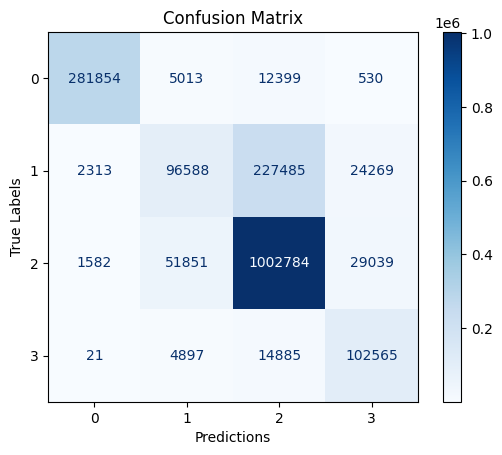

In [24]:
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)

print('Unique values in y_test:', np.unique(y_test))
print('Unique values in y_pred:', np.unique(y_pred))

disp = ConfusionMatrixDisplay(conf_matrix, display_labels=np.unique(y_test))

# Display the confusion matrix
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix')
plt.xlabel('Predictions')
plt.ylabel('True Labels')
plt.show()


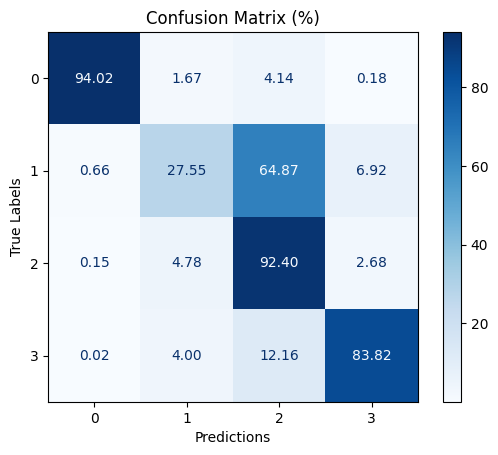

In [25]:
conf_matrix_percentage = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

disp = ConfusionMatrixDisplay(conf_matrix_percentage, display_labels=np.unique(y_test))

disp.plot(cmap='Blues', values_format='.2f')
plt.title('Confusion Matrix (%)')
plt.xlabel('Predictions')
plt.ylabel('True Labels')
plt.show()


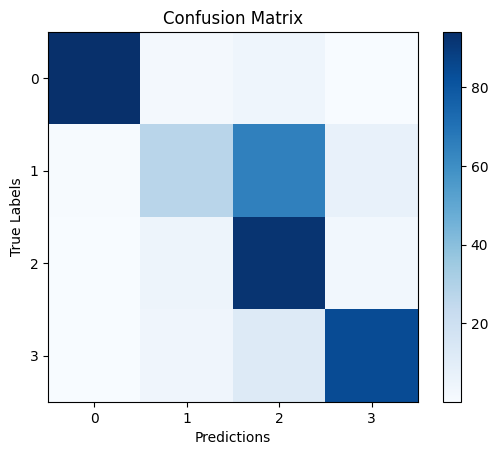

In [26]:
conf_matrix_percentage = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] * 100

disp = ConfusionMatrixDisplay(conf_matrix_percentage, display_labels=np.unique(y_test))

disp.plot(cmap='Blues', include_values=False)  # Remove the numbers
plt.title('Confusion Matrix')
plt.xlabel('Predictions')
plt.ylabel('True Labels')
plt.show()


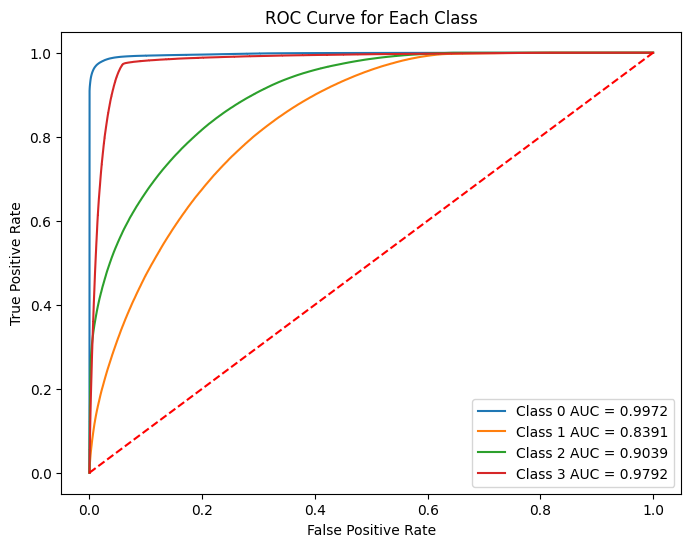

In [27]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize

y_test_bin = label_binarize(y_test, classes=np.unique(y_test))  
y_pred_prob = lgb_model.predict_proba(X_test)  # Get probability estimates for each class

plt.figure(figsize=(8, 6))

for i in range(y_test_bin.shape[1]):
    fpr, tpr, thresholds = roc_curve(y_test_bin[:, i], y_pred_prob[:, i])
    roc_auc = roc_auc_score(y_test_bin[:, i], y_pred_prob[:, i])  
    plt.plot(fpr, tpr, label=f'Class {i} AUC = {roc_auc:.4f}') 

plt.plot([0, 1], [0, 1], color='red', linestyle='--')

# Title and labels for the plot
plt.title('ROC Curve for Each Class')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


In [28]:
# AUC score
print(f'AUC: {roc_auc:.4f}')


AUC: 0.9792
